<h3>Name : Nadir Ali Khan</h3>
<h3>Exam: Mid Exam</h3>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [5]:
data  = pd.read_csv('/home/nak/Data-Science-Course-IBA/assignments/Stock_Market_Regression_Dataset.csv')
df = pd.DataFrame(data)
df.head()

,Opening_Price,Closing_Price_Previous_Day,Daily_High,Daily_Low,Trading_Volume,Market_Cap,P/E_Ratio,EPS,Beta,Dividend_Yield,50_Day_Moving_Avg,200_Day_Moving_Avg,RSI,MACD,Stock_Price
0,0.620303,0.644982,0.374383,0.208268,0.720320,0.811118,0.138601,0.486829,0.248716,0.168107,0.734325,0.538097,0.216185,0.310000,641.701471
1,0.966654,0.848680,0.879947,0.460012,0.623807,0.376768,0.077712,0.401069,0.593981,0.287144,0.847951,0.151100,0.367129,0.124904,816.405928
2,0.404832,0.039661,0.272549,0.400735,0.478165,0.543696,0.274991,0.523041,0.509005,0.316178,0.830200,0.545641,0.332270,0.947339,288.576853
3,0.845112,0.982588,0.692234,0.378223,0.280861,0.663318,0.980817,0.626715,0.881615,0.329103,0.406954,0.906275,0.756867,0.981410,981.428080
4,0.774764,0.448516,0.531068,0.900515,0.551647,0.255397,0.435620,0.516316,0.096720,0.743763,0.109354,0.404918,0.804622,0.467570,439.465739


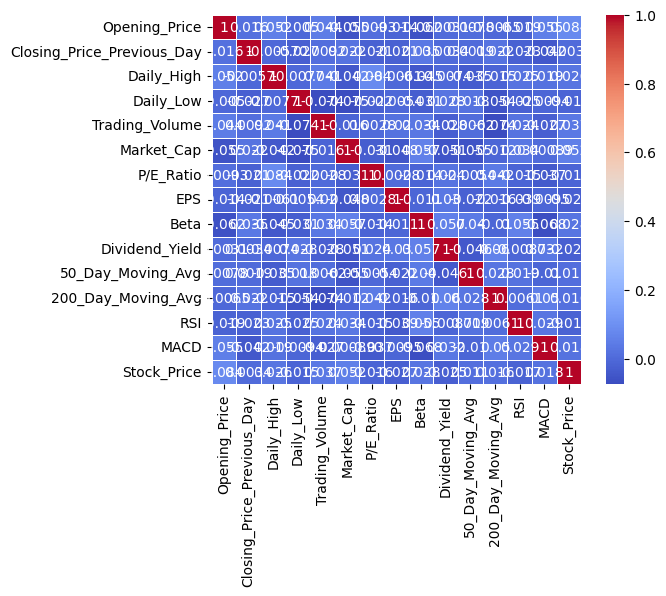

<Figure size 1000x800 with 0 Axes>

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True,  cmap='coolwarm', square=True, linewidths=0.5)
plt.figure(figsize=(10, 8))
plt.show()


In [ ]:
#  print the strong positive and negative correlation code ..




In [13]:
# Use stock market dataset to build a linear and multi regression model that predicts stock prices based on inputs. Calcultate accuraucy score and make plot of actual and predicted labels
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Opening_Price               696 non-null    float64
 1   Closing_Price_Previous_Day  695 non-null    float64
 2   Daily_High                  691 non-null    float64
 3   Daily_Low                   692 non-null    float64
 4   Trading_Volume              695 non-null    float64
 5   Market_Cap                  691 non-null    float64
 6   P/E_Ratio                   689 non-null    float64
 7   EPS                         698 non-null    float64
 8   Beta                        693 non-null    float64
 9   Dividend_Yield              691 non-null    float64
 10  50_Day_Moving_Avg           694 non-null    float64
 11  200_Day_Moving_Avg          690 non-null    float64
 12  RSI                         694 non-null    float64
 13  MACD                        692 non

In [14]:
df.isnull().sum()


Opening_Price                  4
Closing_Price_Previous_Day     5
Daily_High                     9
Daily_Low                      8
Trading_Volume                 5
Market_Cap                     9
P/E_Ratio                     11
EPS                            2
Beta                           7
Dividend_Yield                 9
50_Day_Moving_Avg              6
200_Day_Moving_Avg            10
RSI                            6
MACD                           8
Stock_Price                    0
dtype: int64

In [29]:
df['200_Day_Moving_Avg'].fillna(df['200_Day_Moving_Avg'].mean(), inplace=True)
df['50_Day_Moving_Avg'].fillna(df['50_Day_Moving_Avg'].mean(), inplace=True)
df['Beta'].fillna(df['Beta'].mean(), inplace=True)
df['RSI'].fillna(df['RSI'].mean(), inplace=True)
df['P/E_Ratio'].fillna(df['P/E_Ratio'].mean(), inplace=True)
df['MACD'].fillna(df['MACD'].mean(), inplace=True)
df['Market_Cap'].fillna(df['Market_Cap'].mean(), inplace=True)
df['Trading_Volume'].fillna(df['Trading_Volume'].mean(), inplace=True)
df['Daily_High'].fillna(df['Daily_High'].mean(), inplace=True)
df['Daily_Low'].fillna(df['Daily_Low'].mean(), inplace=True)
df['Opening_Price'].fillna(df['Opening_Price'].mean(), inplace=True)
df['Closing_Price_Previous_Day'].fillna(df['Closing_Price_Previous_Day'].mean(), inplace=True)
df['EPS'].fillna(df['EPS'].mean(), inplace=True)
df['Dividend_Yield'].fillna(df['Dividend_Yield'].mean(), inplace=True)


                 

/tmp/ipykernel_146117/2205160524.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['200_Day_Moving_Avg'].fillna(df['200_Day_Moving_Avg'].mean(), inplace=True)
/tmp/ipykernel_146117/2205160524.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [30]:
df.isnull().sum()

Opening_Price                 0
Closing_Price_Previous_Day    0
Daily_High                    0
Daily_Low                     0
Trading_Volume                0
Market_Cap                    0
P/E_Ratio                     0
EPS                           0
Beta                          0
Dividend_Yield                0
50_Day_Moving_Avg             0
200_Day_Moving_Avg            0
RSI                           0
MACD                          0
Stock_Price                   0
dtype: int64

Accuracy:-0.017519821638758426


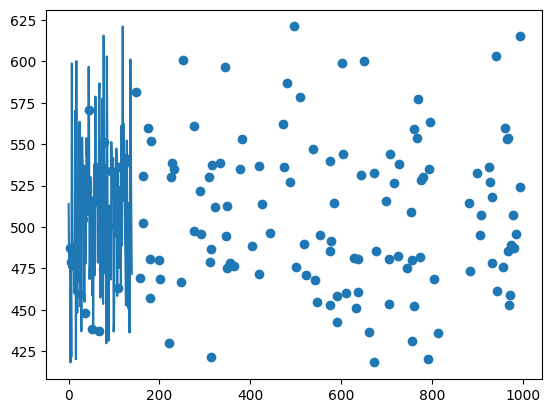

In [ ]:
# Now use Linear and Multi  regression model thata predicts the stcoks price 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df.drop(['Stock_Price'], axis=1)
y = df['Stock_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = r2_score(y_test, y_pred)
print(f"Accuracy:{accuracy}")

# make plot of actual and predict values 

plt.scatter(y_test, y_pred)
# plt.scatter(X_test, y_test)







In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression

In [45]:
data2 = pd.read_csv('/home/nak/Data-Science-Course-IBA/assignments/Healthcare_Classification_Dataset.csv')
df2 = pd.DataFrame(data2)
df2.head()

,Age,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,BMI,Smoking_Status,Physical_Activity,Alcohol_Consumption,Sleep_Duration,Family_History_Diabetes,Family_History_Heart_Disease,Stress_Level,Medication_Adherence,Disease_Risk
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,0.020584,0.969910,0.832443,0.212339,1
1,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229,NaN,0.139494,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0
2,0.592415,0.046450,0.607545,0.170524,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152,0.122038,0.495177,1
3,0.034389,NaN,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,0.969585,0.775133,0.939499,0.894827,0.597900,0.921874,1
4,0.088493,0.195983,0.045227,0.325330,0.388677,0.271349,0.828738,0.356753,0.280935,0.542696,0.140924,0.802197,0.074551,0.986887,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Opening_Price               700 non-null    float64
 1   Closing_Price_Previous_Day  700 non-null    float64
 2   Daily_High                  700 non-null    float64
 3   Daily_Low                   700 non-null    float64
 4   Trading_Volume              700 non-null    float64
 5   Market_Cap                  700 non-null    float64
 6   P/E_Ratio                   700 non-null    float64
 7   EPS                         700 non-null    float64
 8   Beta                        700 non-null    float64
 9   Dividend_Yield              700 non-null    float64
 10  50_Day_Moving_Avg           700 non-null    float64
 11  200_Day_Moving_Avg          700 non-null    float64
 12  RSI                         700 non-null    float64
 13  MACD                        700 non

In [56]:
df2.fillna(df2.mean(), inplace=True)
df2.isnull().sum()


Age                             0
Blood_Pressure                  0
Cholesterol                     0
Glucose_Level                   0
Heart_Rate                      0
BMI                             0
Smoking_Status                  0
Physical_Activity               0
Alcohol_Consumption             0
Sleep_Duration                  0
Family_History_Diabetes         0
Family_History_Heart_Disease    0
Stress_Level                    0
Medication_Adherence            0
Disease_Risk                    0
dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, recall_score, accuracy_score, precision_score

X = df2.drop(['Disease_Risk'], axis=1)
y = df2['Disease_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c_r = classification_report(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print(f"Classification Report:\n\n{c_r}")
print(f"Accuracy Score: {acc_score}")


Classification Report:

              precision    recall  f1-score   support

           0       0.46      0.26      0.33        65
           1       0.53      0.73      0.62        75

    accuracy                           0.51       140
   macro avg       0.50      0.50      0.48       140
weighted avg       0.50      0.51      0.49       140

Accuracy Score: 0.5142857142857142
